In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

2021-12-16 18:31:31.284783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 18:31:31.284829: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_2081_Photo_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
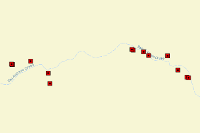

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('4c696522c85e4f32add5a92661b11b42')

stations = output['data0']
obs = output['table0']
feature_service = output['feature_service']

In [3]:
#Merge related records and feature
data = stations.merge(obs, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')

data = data.drop(columns=['Ref_to_Stations','GlobalID_x','GlobalID_y'])
data = data.rename(columns={'OBJECTID_x':'Station_ObjectID','OBJECTID_y':'Record_ObjectID', 'GlobalID_y':'Record_GlobalID'})

In [4]:
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 16


# QAQC

In [4]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Janel Mayo, Joy Stewart}"




Table/Layer:  Stations


No Mismatches Found


In [6]:
QAQC_whitespace(data, exclude_cols=['Comments'], objectID=['Record_ObjectID'])



Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sensor_Size
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Feature_ID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Shutter_Speed_seconds
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Aperture
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Camera_Make_Model
No \xa0 characters found
No double spaces found
No triple spaces fo

In [7]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 16
# of columns:
 25


In [5]:
find_blank_entries(data, exclude_cols=['Surveyor_2','Description'])

No blank Shutter_Speed_seconds
No blank Aperture
No blank Camera_Make_Model
No blank SHAPE
No blank Mitigation_Type
No blank Azimuth_Degrees
No blank Observation_Date
No blank Camera_Height_feet
No blank FocalLength
No blank Lens_Multiplication_Factor
No blank Station_ObjectID
No blank Surveyor_1
No blank Feature_ID
No blank Point_Longitude
No blank ISO
No blank F35_mm_Equivalent_Focal_Length
No blank Point_Latitude
No blank Habitat_Type
No blank Record_ObjectID
No blank Sensor_Size
No blank BHR_Site
No blank Comments
No blank Vertical_Camera_Angle_Degrees


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


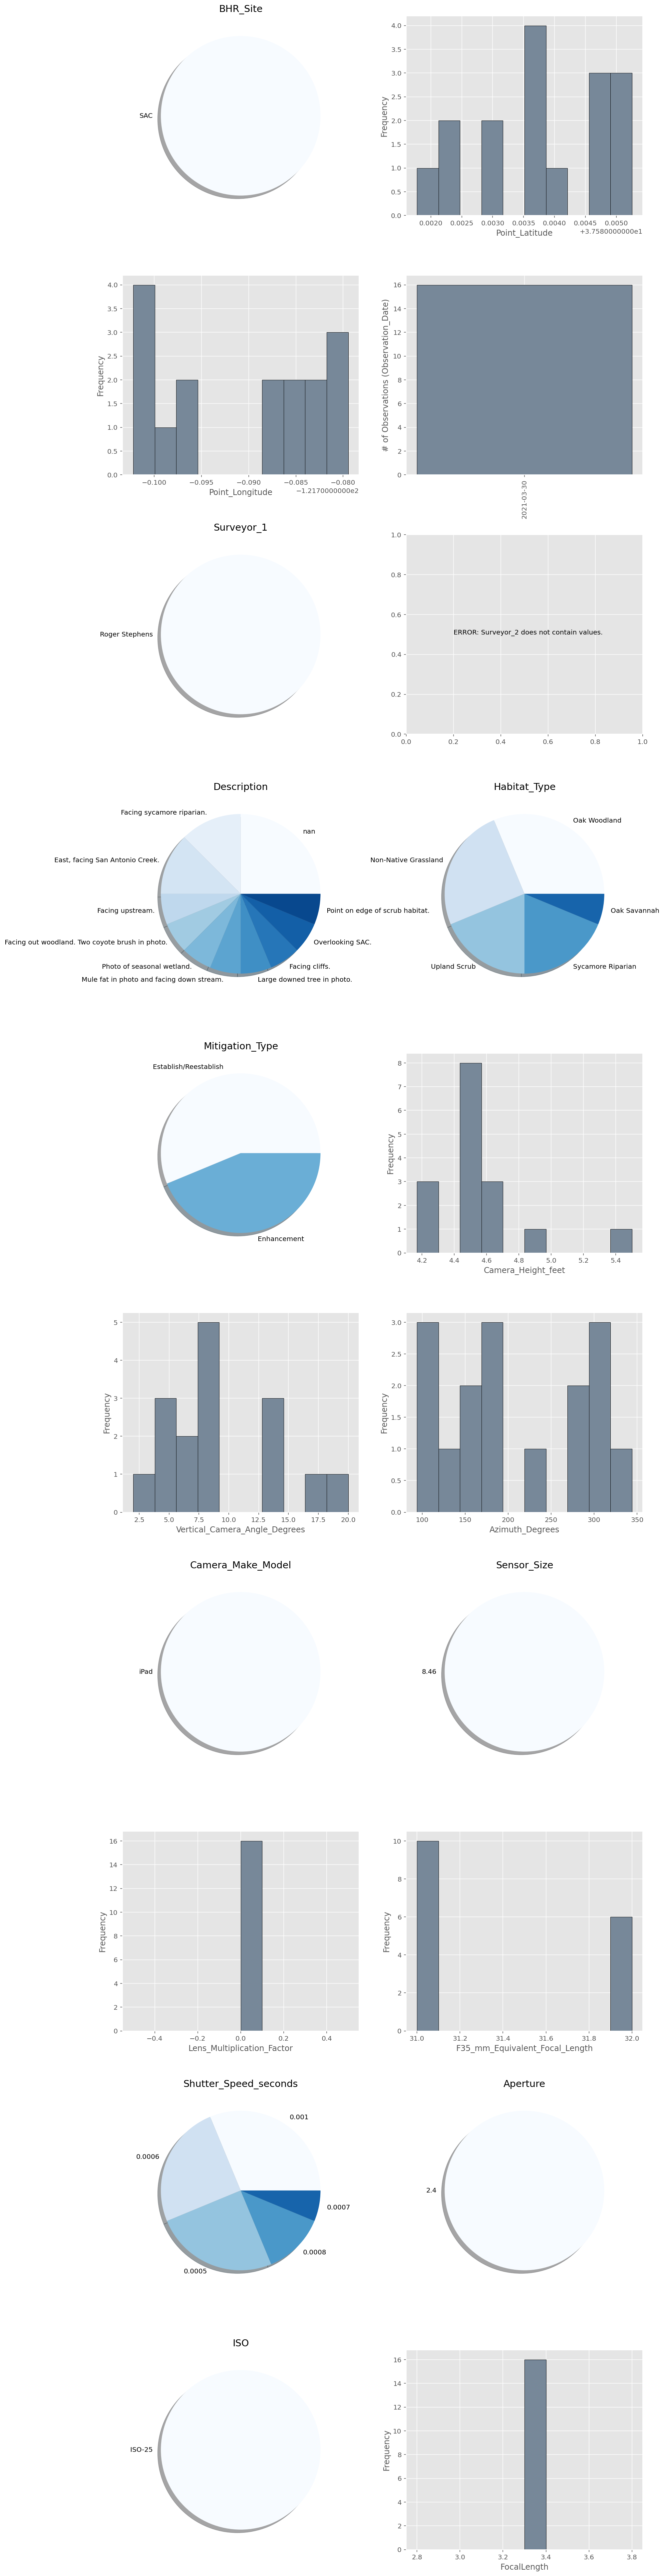

In [9]:
QAQC_plot(sub, cols_to_plot=['BHR_Site', 'Point_Latitude',
       'Point_Longitude', 'Observation_Date',
       'Surveyor_1', 'Surveyor_2', 'Description', 'Habitat_Type',
       'Mitigation_Type', 'Camera_Height_feet',
       'Vertical_Camera_Angle_Degrees', 'Azimuth_Degrees', 'Camera_Make_Model',
       'Sensor_Size', 'Lens_Multiplication_Factor',
       'F35_mm_Equivalent_Focal_Length', 'Shutter_Speed_seconds', 'Aperture',
       'ISO','FocalLength'])

In [6]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations


Found mislabeled photo attachement(s):
Observations
Object ID: 1  Current Name:  SAC_2081PhotoMonitoring_20180327_02a_1.jpg
Object ID: 1  Current Name:  SAC_2081PhotoMonitoring_20180327_02a_2.jpg
Object ID: 2  Current Name:  SAC_2081PhotoMonitoring_20180327_04_1.jpg
Object ID: 2  Current Name:  SAC_2081PhotoMonitoring_20180327_04_2.jpg
Object ID: 3  Current Name:  SAC_2081PhotoMonitoring_20180327_06_1.jpg
Object ID: 3  Current Name:  SAC_2081PhotoMonitoring_20180327_06_2.jpg


Object ID: 4  Current Name:  SAC_2081PhotoMonitoring_20180327_08_1.jpg
Object ID: 4  Current Name:  SAC_2081PhotoMonitoring_20180327_08_2.jpg
Object ID: 5  Current Name:  SAC_2081PhotoMonitoring_20180327_10_1.jpg
Object ID: 5  Current Name:  SAC_2081PhotoMonitoring_20180327_10_2.jpg


Object ID: 6  Current Name:  SAC_2081PhotoMonitoring_20180327_16_1.jpg
Object ID: 6  Current Name:  SAC_2081PhotoMonitoring_20180327_16_2.jpg
Object ID: 7  Current Name:  SAC_2081PhotoMonitoring_20180327_18_1.jpg
Object ID: 7  Current Name:  SAC_2081PhotoMonitoring_20180327_18_2.jpg


Object ID: 8  Current Name:  SAC_2081PhotoMonitoring_20180327_19_1.jpg
Object ID: 8  Current Name:  SAC_2081PhotoMonitoring_20180327_19_2.jpg
Object ID: 9  Current Name:  SAC_2081PhotoMonitoring_20180327_23_1.jpg
Object ID: 10  Current Name:  SAC_2081PhotoMonitoring_20180327_45a_1.jpg
Object ID: 10  Current Name:  SAC_2081PhotoMonitoring_20180327_45a_2.jpg


Object ID: 11  Current Name:  SAC_2081PhotoMonitoring_20180327_46_1.jpg
Object ID: 11  Current Name:  SAC_2081PhotoMonitoring_20180327_46_2.jpg
Object ID: 12  Current Name:  SAC_2081PhotoMonitoring_20180327_47_1.jpg
Object ID: 12  Current Name:  SAC_2081PhotoMonitoring_20180327_47_2.jpg


Object ID: 13  Current Name:  SAC_2081PhotoMonitoring_20180327_25_1.jpg
Object ID: 14  Current Name:  SAC_2081PhotoMonitoring_20180327_02b_1.jpg
Object ID: 14  Current Name:  SAC_2081PhotoMonitoring_20180327_02b_2.jpg


Object ID: 15  Current Name:  SAC_2081PhotoMonitoring_20180327_45b_1.jpg
Object ID: 15  Current Name:  SAC_2081PhotoMonitoring_20180327_45b_2.jpg
Object ID: 16  Current Name:  SAC_2081PhotoMonitoring_20180327_45c_1.jpg
Object ID: 16  Current Name:  SAC_2081PhotoMonitoring_20180327_45c_2.jpg


Object ID: 17  Current Name:  SAC_2081PhotoMonitoring_20190324_16.jpg
Object ID: 18  Current Name:  SAC_2081PhotoMonitoring_20190324_18_1.jpg
Object ID: 18  Current Name:  SAC_2081PhotoMonitoring_20190324_18_2.jpg


Object ID: 19  Current Name:  SAC_2081PhotoMonitoring_20190324_19_1.jpg
Object ID: 19  Current Name:  SAC_2081PhotoMonitoring_20190324_19_2.jpg
Object ID: 20  Current Name:  SAC_2081PhotoMonitoring_20190324_2a_1.jpg
Object ID: 20  Current Name:  SAC_2081PhotoMonitoring_20190324_2a_2.jpg
Object ID: 21  Current Name:  SAC_2081PhotoMonitoring_20190324_2b_1.jpg
Object ID: 21  Current Name:  SAC_2081PhotoMonitoring_20190324_2b_2.jpg


Object ID: 22  Current Name:  SAC_2081PhotoMonitoring_20190324_10_1.jpg
Object ID: 22  Current Name:  SAC_2081PhotoMonitoring_20190324_10_2.jpg
Object ID: 23  Current Name:  SAC_2081PhotoMonitoring_20190324_04_1.jpg
Object ID: 23  Current Name:  SAC_2081PhotoMonitoring_20190324_04_2.jpg


Object ID: 24  Current Name:  SAC_2081PhotoMonitoring_20190324_06_1.jpg
Object ID: 24  Current Name:  SAC_2081PhotoMonitoring_20190324_06_2.jpg
Object ID: 25  Current Name:  SAC_2081PhotoMonitoring_20190324_08_1.jpg
Object ID: 25  Current Name:  SAC_2081PhotoMonitoring_20190324_08_2.jpg


Object ID: 26  Current Name:  SAC_2081PhotoMonitoring_20190324_23_1.jpg
Object ID: 26  Current Name:  SAC_2081PhotoMonitoring_20190324_23_2.jpg
Object ID: 27  Current Name:  SAC_2081PhotoMonitoring_20190324_25_1.jpg
Object ID: 27  Current Name:  SAC_2081PhotoMonitoring_20190324_25_2.jpg
Object ID: 28  Current Name:  SAC_2081PhotoMonitoring_20190324_46_1.jpg
Object ID: 28  Current Name:  SAC_2081PhotoMonitoring_20190324_46_2.jpg


Object ID: 29  Current Name:  SAC_2081PhotoMonitoring_20190324_45a_1.jpg
Object ID: 29  Current Name:  SAC_2081PhotoMonitoring_20190324_45a_2.jpg
Object ID: 30  Current Name:  SAC_2081PhotoMonitoring_20190324_45b_1.jpg
Object ID: 30  Current Name:  SAC_2081PhotoMonitoring_20190324_45b_2.jpg


Object ID: 31  Current Name:  SAC_2081PhotoMonitoring_20190324_45c_1.jpg
Object ID: 31  Current Name:  SAC_2081PhotoMonitoring_20190324_45c_2.jpg
Object ID: 32  Current Name:  SAC_2081PhotoMonitoring_20190324_47_1.jpg
Object ID: 32  Current Name:  SAC_2081PhotoMonitoring_20190324_47_2.jpg
Object ID: 34  Current Name:  SAC_2081PhotoMonitoring_20200330_19_2.jpg
Object ID: 34  Current Name:  SAC_2081PhotoMonitoring_20200330_19_1.jpg


Object ID: 35  Current Name:  SAC_2081PhotoMonitoring_20200330_18_2.jpg
Object ID: 35  Current Name:  SAC_2081PhotoMonitoring_20200330_18_1.jpg
Object ID: 36  Current Name:  SAC_2081PhotoMonitoring_20200330_16_1.jpg
Object ID: 36  Current Name:  SAC_2081PhotoMonitoring_20200330_16_2.jpg
Object ID: 37  Current Name:  SAC_2081PhotoMonitoring_20200330_2a_1.jpg
Object ID: 37  Current Name:  SAC_2081PhotoMonitoring_20200330_2a_2.jpg


Object ID: 38  Current Name:  SAC_2081PhotoMonitoring_20200330_2b_1.jpg
Object ID: 38  Current Name:  SAC_2081PhotoMonitoring_20200330_2b_2.jpg
Object ID: 39  Current Name:  SAC_2081PhotoMonitoring_20200330_46_2.jpg
Object ID: 39  Current Name:  SAC_2081PhotoMonitoring_20200330_46_1.jpg


Object ID: 40  Current Name:  SAC_2081PhotoMonitoring_20200330_45a_2.jpg
Object ID: 40  Current Name:  SAC_2081PhotoMonitoring_20200330_45a_1.jpg
Object ID: 41  Current Name:  SAC_2081PhotoMonitoring_20200330_45b_1.jpg
Object ID: 41  Current Name:  SAC_2081PhotoMonitoring_20200330_45b_2.jpg
Object ID: 42  Current Name:  SAC_2081PhotoMonitoring_20200330_45_1.jpg
Object ID: 42  Current Name:  SAC_2081PhotoMonitoring_20200330_45c_2.jpg


Object ID: 43  Current Name:  SAC_2081PhotoMonitoring_20200330_47_2.jpg
Object ID: 43  Current Name:  SAC_2081PhotoMonitoring_20200330_47_1.jpg
Object ID: 44  Current Name:  SAC_2081PhotoMonitoring_20200330_06_1.jpg
Object ID: 44  Current Name:  SAC_2081PhotoMonitoring_20200330_06_2.jpg
Object ID: 45  Current Name:  SAC_2081PhotoMonitoring_20200330_10_2.jpg
Object ID: 45  Current Name:  SAC_2081PhotoMonitoring_20200330_10_1.jpg


Object ID: 46  Current Name:  SAC_2081PhotoMonitoring_20200330_04_1.jpg
Object ID: 46  Current Name:  SAC_2081PhotoMonitoring_20200330_04_2.jpg
Object ID: 47  Current Name:  SAC_2081PhotoMonitoring_20200330_08_2.jpg
Object ID: 47  Current Name:  SAC_2081PhotoMonitoring_20200330_08_1.jpg
Object ID: 47  Current Name:  SAC_2081PhotoMonitoring_20200331_08_4.jpg
Object ID: 47  Current Name:  SAC_2081PhotoMonitoring_20200331_08_3.jpg
Object ID: 48  Current Name:  SAC_2081PhotoMonitoring_20200330_23_1.jpg
Object ID: 48  Current Name:  SAC_2081PhotoMonitoring_20200330_23_2.jpg


Object ID: 49  Current Name:  SAC_2081PhotoMonitoring_20200330_25_1.jpg
Object ID: 49  Current Name:  SAC_2081PhotoMonitoring_20200330_25_2.jpg
Object ID: 50  Current Name:  SAC_2081PhotoMonitoring_20210330_19_2.jpg
Object ID: 50  Current Name:  SAC_2081PhotoMonitoring_20210330_19_1.jpg


Object ID: 51  Current Name:  SAC_2081PhotoMonitoring_20210330_18_1.jpg
Object ID: 51  Current Name:  SAC_2081PhotoMonitoring_20210330_18_2.jpg
Object ID: 52  Current Name:  SAC_2081PhotoMonitoring_20210330_2a_3.jpg
Object ID: 52  Current Name:  SAC_2081PhotoMonitoring_20210330_2a_2.jpg
Object ID: 52  Current Name:  SAC_2081PhotoMonitoring_20210330_2a_1.jpg
Object ID: 53  Current Name:  SAC_2081PhotoMonitoring_20210330_2b_1.jpg
Object ID: 53  Current Name:  SAC_2081PhotoMonitoring_20210330_2b_2.jpg
Object ID: 53  Current Name:  SAC_2081PhotoMonitoring_20210330_2b_3.jpg


Object ID: 54  Current Name:  SAC_2081PhotoMonitoring_20210330_16_1.jpg
Object ID: 54  Current Name:  SAC_2081PhotoMonitoring_20210330_16_2.jpg
Object ID: 55  Current Name:  SAC_2081PhotoMonitoring_20210330_10_1.jpg
Object ID: 55  Current Name:  SAC_2081PhotoMonitoring_20210330_10_2.jpg


Object ID: 56  Current Name:  SAC_2081PhotoMonitoring_20210330_08_3.jpg
Object ID: 56  Current Name:  SAC_2081PhotoMonitoring_20210330_08_2.jpg
Object ID: 56  Current Name:  SAC_2081PhotoMonitoring_20210330_08_1.jpg
Object ID: 57  Current Name:  SAC_2081PhotoMonitoring_20210330_06_2.jpg
Object ID: 57  Current Name:  SAC_2081PhotoMonitoring_20210330_06_1.jpg


Object ID: 58  Current Name:  SAC_2081PhotoMonitoring_20210330_04_2.jpg
Object ID: 58  Current Name:  SAC_2081PhotoMonitoring_20210330_04_1.jpg
Object ID: 58  Current Name:  SAC_2081PhotoMonitoring_20210330_04_3.jpg
Object ID: 59  Current Name:  SAC_2081PhotoMonitoring_20210330_23_2.jpg
Object ID: 59  Current Name:  SAC_2081PhotoMonitoring_20210330_23_1.jpg
Object ID: 59  Current Name:  SAC_2081PhotoMonitoring_20210330_23_3.jpg
Object ID: 60  Current Name:  SAC_2081PhotoMonitoring_20210330_25_1.jpg
Object ID: 60  Current Name:  SAC_2081PhotoMonitoring_20210330_25_2.jpg
Object ID: 60  Current Name:  SAC_2081PhotoMonitoring_20210330_25_3.jpg


Object ID: 61  Current Name:  SAC_2081PhotoMonitoring_20210330_46_2.jpg
Object ID: 61  Current Name:  SAC_2081PhotoMonitoring_20210330_46_3.jpg
Object ID: 61  Current Name:  SAC_2081PhotoMonitoring_20210330_46_1.jpg
Object ID: 62  Current Name:  SAC_2081PhotoMonitoring_20210330_45a_1.jpg
Object ID: 62  Current Name:  SAC_2081PhotoMonitoring_20210330_45a_2.jpg
Object ID: 63  Current Name:  SAC_2081PhotoMonitoring_20210330_45b_2.jpg
Object ID: 63  Current Name:  SAC_2081PhotoMonitoring_20210330_45b_1.jpg


Object ID: 64  Current Name:  SAC_2081PhotoMonitoring_20210330_45c_2.jpg
Object ID: 64  Current Name:  SAC_2081PhotoMonitoring_20210330_45c_1.jpg
Object ID: 65  Current Name:  SAC_2081PhotoMonitoring_20210330_47_1.jpg
Object ID: 65  Current Name:  SAC_2081PhotoMonitoring_20210330_47_2.jpg
Object ID: 65  Current Name:  SAC_2081PhotoMonitoring_20210330_47_3.jpg
Object ID: 65  Current Name:  SAC_2081PhotoMonitoring_20210330_47_4.jpg


# Export data deliverable

In [5]:
data.columns

Index(['Station_ObjectID', 'BHR_Site', 'Feature_ID', 'Point_Latitude',
       'Point_Longitude', 'SHAPE', 'Record_ObjectID', 'Observation_Date',
       'Surveyor_1', 'Surveyor_2', 'Description', 'Habitat_Type',
       'Mitigation_Type', 'Camera_Height_feet',
       'Vertical_Camera_Angle_Degrees', 'Azimuth_Degrees', 'Camera_Make_Model',
       'Sensor_Size', 'Lens_Multiplication_Factor',
       'F35_mm_Equivalent_Focal_Length', 'Shutter_Speed_seconds', 'Aperture',
       'ISO', 'Comments', 'FocalLength'],
      dtype='object')

In [9]:
data = data.rename(columns={'Station_ObjectID':'Station ID','Record_ObjectID':'Record ID'})

In [12]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Mitigation_Type',
    'Habitat_Type',
    'Description',
    'Point_Latitude',
    'Point_Longitude',
    'Camera_Height_feet',
    'Vertical_Camera_Angle_Degrees',
    'Azimuth_Degrees',
    'Camera_Make_Model',
    'Sensor_Size',
    'Lens_Multiplication_Factor',
    'F35_mm_Equivalent_Focal_Length',
    'Shutter_Speed_seconds',
    'Aperture',
    'ISO',
    'FocalLength',
    'Comments',
    'Station ID',
    'Feature_ID',
    'Record ID',
    'SHAPE'
]

In [13]:
export_data_deliverable(data, feature_service, field_order, file_name='2081_Photo_Monitoring')

Exported to Outputs/2081_Photo_Monitoring_Data_20211026.xlsx
